# 环境变量

In [2]:
import os
import sys
# 环境变量
env_v=sys.path
print(env_v)
# 添加环境变量
path='/home/test'
add_env_v=sys.path.append(path)
print(sys.path)

print(os.getenv('work',-1))


['d:\\Coding\\handbook\\notebook', 'c:\\Users\\axjing\\miniconda3\\envs\\dl\\python311.zip', 'c:\\Users\\axjing\\miniconda3\\envs\\dl\\DLLs', 'c:\\Users\\axjing\\miniconda3\\envs\\dl\\Lib', 'c:\\Users\\axjing\\miniconda3\\envs\\dl', '', 'c:\\Users\\axjing\\miniconda3\\envs\\dl\\Lib\\site-packages', 'c:\\Users\\axjing\\miniconda3\\envs\\dl\\Lib\\site-packages\\win32', 'c:\\Users\\axjing\\miniconda3\\envs\\dl\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\axjing\\miniconda3\\envs\\dl\\Lib\\site-packages\\Pythonwin', '/home/test']
['d:\\Coding\\handbook\\notebook', 'c:\\Users\\axjing\\miniconda3\\envs\\dl\\python311.zip', 'c:\\Users\\axjing\\miniconda3\\envs\\dl\\DLLs', 'c:\\Users\\axjing\\miniconda3\\envs\\dl\\Lib', 'c:\\Users\\axjing\\miniconda3\\envs\\dl', '', 'c:\\Users\\axjing\\miniconda3\\envs\\dl\\Lib\\site-packages', 'c:\\Users\\axjing\\miniconda3\\envs\\dl\\Lib\\site-packages\\win32', 'c:\\Users\\axjing\\miniconda3\\envs\\dl\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\axjing\\mi

# 分组卷积工作原理
Group convolution（分组卷积）的工作原理涉及将输入和输出通道分成若干组，以便对每组进行独立的卷积操作。以下是分组卷积的基本工作原理：

1. **通道分组：** 首先，输入通道和输出通道被划分为$G$组，其中$G$是分组数。每个组内有相等数量的输入通道和输出通道。例如，如果输入通道数是$C_{\text{in}}\)，输出通道数是$C_{\text{out}}\)，而分组数是$G\)，则每个分组内的通道数量为$C_{\text{in}}/G$和$C_{\text{out}}/G\)。

2. **独立卷积操作：** 对于每个分组，分别使用相应的输入通道组和输出通道组执行卷积操作。每组都有自己的卷积核集合，这些卷积核仅与相应的输入通道组相关联。这意味着每个分组都有自己独立的卷积过程，独立生成输出通道组。

3. **结果拼接：** 将每个分组产生的输出通道组合并成最终的输出。这个过程涉及将每个分组的输出通道按照通道维度进行拼接，形成最终的输出特征图。

这种方式使得每个分组内的通道只与同组内的通道进行卷积操作，而不与其他分组的通道进行卷积。这可以在一定程度上减少模型的参数量，并且提高计算效率。

下面是一个简单的伪代码表示，说明了分组卷积的基本工作原理：

```python
# 伪代码示例
for each_group in range(groups):
    # 从输入通道和输出通道中选择相应的通道组
    input_channel_group = input_channels[each_group * (C_in // groups) : (each_group + 1) * (C_in // groups)]
    output_channel_group = output_channels[each_group * (C_out // groups) : (each_group + 1) * (C_out // groups)]

    # 使用相应的通道组进行独立的卷积操作
    output_group = convolve(input_channel_group, output_channel_group, kernel_size, stride, padding)

    # 存储每个分组的输出

# 将每个分组的输出拼接成最终的输出特征图
final_output = concatenate(output_group_1, output_group_2, ..., output_group_G)
```

这就是分组卷积的基本工作原理，通过对通道进行分组，实现了部分独立卷积，从而减少了参数量。

分组卷积（Group Convolution）是通过将输入和输出通道划分为若干组，每组内的通道独立进行卷积操作来实现的。这样，卷积核也被分成了若干组，每组与相应的输入通道组相连，从而完成卷积运算。下面是分组卷积的公式和方法的简要描述：

### 公式：

对于输入特征图$X$和输出特征图$Y\)，以及分组卷积的参数（卷积核权重）$W\)，分组卷积的输出可以表示为：

$$
Y_{i,j,k} = \sum_{l=0}^{C_{\text{in}}/G - 1} \sum_{m=0}^{H_{\text{f}} - 1} \sum_{n=0}^{W_{\text{f}} - 1} X_{i,l \cdot G + m,j \cdot S + n} \cdot W_{k,l,m,n}
$$

其中：

-$Y_{i,j,k}$是输出特征图的第$i$个样本的第$j$个通道的第$k$个元素。
-$X_{i,c,h,w}$是输入特征图的第$i$个样本的第$c$个通道的第$h$行、第$w$列的元素。
-$W_{k,c,m,n}$是第$k$个输出通道的第$c$个输入通道的卷积核的第$m$行、第$n$列的权重。
-$C_{\text{in}}$是输入通道数，\(H_{\text{f}}$和$W_{\text{f}}$是卷积核的高度和宽度，\(S$是卷积的步幅，\(G$是分组数。

### 方法：

1. **分组划分：** 将输入和输出通道分成$G$组，确保输入通道数和输出通道数都是$G$的整数倍。

2. **分组卷积操作：** 对于每个分组，独立地对输入通道和输出通道进行卷积操作。这就意味着每个分组有自己的卷积核集合，用于处理相应的输入通道和生成相应的输出通道。

3. **拼接结果：** 将各个分组的卷积结果进行拼接，得到最终的输出特征图。

在PyTorch中，通过设置`groups`参数来实现分组卷积。例如，`nn.Conv2d(in_channels=..., out_channels=..., kernel_size=..., groups=...)`中的`groups`参数即用于指定分组卷积的分组数。

In [3]:
import torch
import torch.nn as nn

print(f"显卡是否可用{torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"显卡信息：{torch.cuda.get_device_name()}")
    device = torch.device("cuda")
    memory_size = torch.cuda.get_device_properties(device).total_memory
    print("显存大小:", memory_size)
    frequency = torch.cuda.get_device_properties(device)#.clock_rate
    print("核心频率:", frequency)
# 普通卷积
conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=1)
print(conv1)

# 分组卷积，每个输入通道独立卷积，输出通道数也是输入通道数
conv2 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=1, groups=3)
print(conv2)

显卡是否可用True
显卡信息：NVIDIA GeForce MX150
显存大小: 2147352576
核心频率: _CudaDeviceProperties(name='NVIDIA GeForce MX150', major=6, minor=1, total_memory=2047MB, multi_processor_count=3)
Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=3)


# ord()表示给定字符的 Unicode 码点（code point）

在 Python 中，ord() 函数是一个内置函数，用于返回表示给定字符的 Unicode 码点（code point）。它接受一个字符串参数，该字符串应该是长度为 1 的字符。然后，它返回一个表示该字符 Unicode 码点的整数值。
```python
ord(character)
```
其中，`character`是是要获取 Unicode 码点的字符。

In [11]:
print(ord("你"))
print(ord("a"))
print(ord("A"))
list(range(ord("!"), ord("~")+1))

20320
97
65


[33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126]

# scipy
## scipy.stats.norm
在 SciPy 中，`scipy.stats.norm` 是一个用于操作正态分布（也称为高斯分布）的模块。这个模块提供了一系列函数来计算正态分布的概率密度函数、累积分布函数、分位数等。下面是一些 `scipy.stats.norm` 模块中常用的函数：

1. **概率密度函数（PDF）**：
   - `pdf(x, loc=0, scale=1)`：计算给定值 `x` 处的概率密度函数值。其中 `loc` 是均值参数，`scale` 是标准差参数。

2. **累积分布函数（CDF）**：
   - `cdf(x, loc=0, scale=1)`：计算小于等于给定值 `x` 的累积分布函数值。

3. **分位数函数**：
   - `ppf(q, loc=0, scale=1)`：计算累积分布函数值为 `q` 的分位数。

4. **生成随机样本**：
   - `rvs(size=1, loc=0, scale=1, random_state=None)`：生成指定数量的随机样本。其中 `size` 是生成样本的数量，`random_state` 是随机数种子。
### 概率密度函数（Probability Density Function，PDF）
概率密度函数（Probability Density Function，PDF）是用于描述连续型随机变量概率分布的函数。对于连续型随机变量，其取值范围是一个连续的区间，而不是离散的点。概率密度函数在这个连续区间上定义了每个可能取值的概率密度。

概率密度函数具有以下性质：

1. **非负性**：对于所有的变量取值，概率密度函数的值都是非负的。
2. **积分为1**：概率密度函数在整个取值范围上的积分等于1。这是因为对于连续型随机变量，概率密度函数描述的是概率密度而不是概率，因此在某个具体取值上的概率为0，但在一定范围内的概率则可以表示为该

概率密度函数（Probability Density Function，PDF）的具体形式取决于所描述的随机变量的分布类型。以下是一些常见的概率密度函数的公式：
1. **正态分布（高斯分布）**：
   正态分布的概率密度函数具有如下形式：
   $$
   f(x) = \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
   $$
   其中，$\mu $是分布的均值，$\sigma $是分布的标准差。

2. **指数分布**：
   指数分布的概率密度函数如下：
   $$
   f(x) = \lambda e^{-\lambda x}
   $$
   其中，$\lambda $是分布的参数，通常称为速率参数。

3. **均匀分布**：
   均匀分布在区间$[a, b]$上的概率密度函数为常数，其形式为：
   $$
   f(x) = \frac{1}{b - a}, \quad a \leq x \leq b
   $$
   在区间$[a, b]$以外的部分概率密度函数值为零。

4. **伽马分布**：
   伽马分布的概率密度函数为：
   $$
   f(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha - 1} e^{-\beta x}
   $$
   其中，$\alpha $和$ \beta $是分布的形状和尺度参数，$\Gamma(\cdot) $是伽马函数。

5. **泊松分布**：
   泊松分布的概率密度函数为：
   $$
   f(k) = \frac{\lambda^k e^{-\lambda}}{k!}
   $$
   其中，$\lambda $是分布的参数，表示单位时间（或单位面积）内事件发生的平均次数，$k $是事件发生的次数。

以上是一些常见的概率密度函数的公式。不同类型的随机变量可能会有不同的分布，因此其概率密度函数也会有所不同。
这里是一个简单的示例，演示了如何使用 `scipy.stats.norm` 中的函数：
这个示例演示了如何使用 `scipy.stats.norm` 来计算正态分布的概率密度函数、累积分布函数以及生成随机样本，并通过 Matplotlib 绘制这些函数的图形。

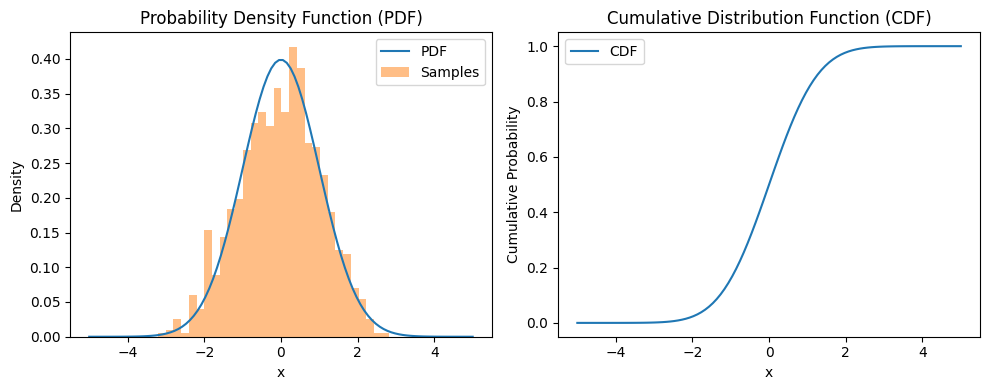

In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# 定义均值和标准差
mu = 0
sigma = 1

# 计算概率密度函数（PDF）和累积分布函数（CDF）
x = np.linspace(-5, 5, 100)
pdf = norm.pdf(x, mu, sigma)
cdf = norm.cdf(x, mu, sigma)

# 生成随机样本
samples = norm.rvs(size=1000, loc=mu, scale=sigma)

# 绘制概率密度函数（PDF）和累积分布函数（CDF）
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(x, pdf, label='PDF')
plt.hist(samples, bins=30, density=True, alpha=0.5, label='Samples')
plt.title('Probability Density Function (PDF)')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, cdf, label='CDF')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
print("hello".split())
print(list("hello , word!"))

['hello']
['h', 'e', 'l', 'l', 'o', ' ', ',', ' ', 'w', 'o', 'r', 'd', '!']


# python中set数据结构和dict数据结构的区别与联系

在 Python 中，`set` 和 `dict` 都是常用的数据结构，它们有一些相似之处，但也有一些重要的区别。

1. **相同点**：

   - **无序性**：`set` 和 `dict` 中的元素都是无序的，即它们的元素没有固定的顺序。
   
   - **唯一性**：`set` 中的元素是唯一的，而 `dict` 中的键是唯一的。

2. **区别**：

   - **存储内容**：
     
     - `set` 是由一组唯一的元素组成的无序集合。
     
     - `dict` 是由一组键值对（key-value pairs）组成的，其中每个键都是唯一的，而值可以重复。

   - **元素访问**：
     
     - 在 `set` 中，元素是通过成员关系测试（membership tests）来访问的，即通过检查元素是否属于集合来确定。
     
     - 在 `dict` 中，元素是通过键来访问的，即通过键来获取对应的值。

3. **联系**：

   - `set` 和 `dict` 都可以通过大括号 `{}` 来创建。
   
   - `set` 和 `dict` 都可以使用迭代器（iterators）来遍历其中的元素。
   
   - `set` 和 `dict` 都是可变的数据结构，可以动态地添加、删除元素。
   
   - `set` 和 `dict` 都可以进行集合运算，如并集、交集、差集等。
4. 使用场景
`set` 和 `dict` 都是 Python 中常用的数据结构，它们都有自己独特的特点和用途。
   - `set` 用于存储一组唯一的元素，适合于需要快速查找、去重的场景；
   - `dict` 用于存储键值对的映射关系，适合于需要按照键来检索值的场景。

```python
# 创建一个集合
my_set = {1, 2, 3, 4, 5}

# 创建一个字典
my_dict = {'a': 1, 'b': 2, 'c': 3}

# 访问集合中的元素
for element in my_set:
    print(element)

# 访问字典中的键值对
for key, value in my_dict.items():
    print(key, value)

# 添加元素到集合
my_set.add(6)

# 添加键值对到字典
my_dict['d'] = 4

print(my_set)  # 输出：{1, 2, 3, 4, 5, 6}
print(my_dict)  # 输出：{'a': 1, 'b': 2, 'c': 3, 'd': 4}
```

# ftfy修复 Unicode 文本的编码问题
`ftfy` 是 Python 中的一个库，全称为 "fixes text for you"。它用于修复 Unicode 文本的编码问题，使得文本能够正确地解码和显示。

以下是一个简单的代码示例，演示了如何使用 `ftfy` 库修复文本编码问题：

```python
import ftfy

# 一个包含编码问题的文本
text_with_encoding_issue = 'This is a test \ud83d\ude00'  # 包含了一个无效的 Unicode 字符

# 使用 ftfy 修复编码问题
fixed_text = ftfy.fix_text(text_with_encoding_issue)

print(fixed_text)  # 输出："This is a test 😀"
```

在这个示例中，原始文本包含一个无效的 Unicode 字符 `\ud83d\ude00`（这是笑脸表情符号），在某些情况下可能导致解码错误。通过调用 `ftfy.fix_text()` 函数，`ftfy` 库会自动检测并修复这个编码问题，最终将文本正确地解码为 "This is a test 😀"。

In [12]:
import ftfy

# 一个包含编码问题的文本
text_with_encoding_issue = 'This is a test \ud83d\ude00'  # 包含了一个无效的 Unicode 字符

# 使用 ftfy 修复编码问题
fixed_text = ftfy.fix_text(text_with_encoding_issue)

print(fixed_text)  # 输出："This is a test 😀"

This is a test 😀


## 防止出现路径错误问题

In [5]:
import os
import sys
from pathlib import Path
FILE = Path(__file__).resolve()
ROOT = FILE.parents[0]  # YOLOv5 root directory
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))  # add ROOT to PATH
ROOT = Path(os.path.relpath(ROOT, Path.cwd()))  # relative

NameError: name '__file__' is not defined

# platform 判断平台

In [22]:
import platform

MACOS, LINUX, WINDOWS = (platform.system() == x for x in ['Darwin', 'Linux', 'Windows'])  # environment booleans

Linux


# 路径处理
## pathlib

In [7]:
from pathlib import Path
file_path='/root/home/user1/test_qwertyuiop0.png'
f=Path(file_path)
f1 = str(f).replace(f.suffix, f'_openvino_model{os.sep}')
print(f.stem)
print(f1)
print(isinstance(file_path,str))
print('.png' in file_path)
print('.png1' in file_path)

test_qwertyuiop0
/root/home/user1/test_qwertyuiop0_openvino_model/
True
True
False


# 字符串处理
## replace

In [8]:
s1="net.state.module.layer1"
s2="net.stata1.m.layer1"

s1_o=s1.replace("moudle.","")
s2_o=s2.replace("module.","")
print(s1_o)
print(s2_o)

net.state.module.layer1
net.stata1.m.layer1


# Lambda函数

In [10]:
# list
root_featmap_nums = 64
featmaps = [root_featmap_nums*2**i for i in range(6)]
print(featmaps)
# tuple
print((1 for i in range(2)))
print(tuple([1 for i in range(3)]))
# path
save_ckpt = os.path.join("/", "model_name", "{}_Fold{}".format("UNet", 0))
print(save_ckpt)
# if
internal_channels=8
internal_channels= 1 if internal_channels==0 else internal_channels
print(internal_channels)

[64, 128, 256, 512, 1024, 2048]
<generator object <genexpr> at 0x7f43eb3229d0>
(1, 1, 1)
/model_name/UNet_Fold0
8


# pytorch常用函数

In [11]:
import torch

# torch.cat
a=[]
for i in range(4):
    a.append(torch.ones(1,4,4))
a_=torch.cat(a,dim=0)
print(a_.shape)
print(a_)

torch.Size([4, 4, 4])
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])


# 装饰器

In [12]:
def my_decorator(func):
    def wrapper():
        print("Something is happening before the function is called.")
        func()
        print("Something is happening after the function is called.")
    return wrapper

@my_decorator
def say_hello():
    print("Hello!")

say_hello()
import time

def timing_decorator(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"{func.__name__} took {end_time - start_time} seconds to run.")
        return result
    return wrapper

@timing_decorator
def example_function():
    # Some time-consuming task
    time.sleep(2)
    print("Function executed.")

example_function()

import logging
from functools import wraps

def logging_decorator(func):
    """
    Decorator that logs information about the function's execution.
    
    Parameters:
    - func: The function to be decorated.
    
    Returns:
    The decorated function.
    """
    @wraps(func)
    def wrapper(*args, **kwargs):
        logging.info(f"Executing {func.__name__} with arguments {args} and keyword arguments {kwargs}.")
        result = func(*args, **kwargs)
        logging.info(f"{func.__name__} executed successfully. Result: {result}")
        return result
    return wrapper

# 配置日志记录
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 使用装饰器
@logging_decorator
def add_numbers(a, b):
    """
    Example function that adds two numbers.
    """
    return a + b

# 调用被装饰的函数
result = add_numbers(3, 5)

Something is happening before the function is called.
Hello!
Something is happening after the function is called.


2024-01-05 02:47:53,134 - INFO - Executing add_numbers with arguments (3, 5) and keyword arguments {}.
2024-01-05 02:47:53,135 - INFO - add_numbers executed successfully. Result: 8


Function executed.
example_function took 2.0009446144104004 seconds to run.


# “*”作为函数参数的作用
## 收集任意数量的位置参数 `*args`
如果你想要一个函数能够接受任意数量的位置参数，你可以使用一个带有星号的参数，但是这个星号后面必须有一个参数名。

这里的`*args`表示收集任意数量的位置参数，并将它们存储在元组 `args` 中。这样，你可以在函数体内循环访问这些参数。

In [13]:
def star_args_usage(*args):
    print(type(args),args)
    for i in args:
        print(i)
star_args_usage(1,2,3,5,5,6,3)

<class 'tuple'> (1, 2, 3, 5, 5, 6, 3)
1
2
3
5
5
6
3


## 指定关键字参数 
测试函数中单独一个“*”的作用：
如果你想在函数定义中指定一些必须使用关键字传递的参数，可以使用带有星号的参数。

In [14]:
def star_usage(*,a,b,c=3):
    """_summary_
    测试函数中单独一个“*”的作用：
    在你提供的函数签名中，*（单独的星号）的作用是指定在此之后的参数必须使用关键字传递，而不能使用位置传递。这样的语法用于强制调用者在调用函数时通过关键字明确指定某些参数的值。
    Args:
        a (int, optional): _description_. Defaults to 1.
        b (int, optional): _description_. Defaults to 2.
        c (int, optional): _description_. Defaults to 3.

    Returns:
        _type_: _description_
    """
    return a,b,c
def star_usage1(a,b,*,c,d):
    """
    在这个例子中,a 和 b 是位置参数，而 c 和 d 必须使用关键字传递。这是因为在星号后的参数只能通过关键字传递。
    """
    return a,b,c,d
print(star_usage(a=2,b=3,c=4))
print(star_usage1(1,2,c=2,d=3))

(2, 3, 4)
(1, 2, 2, 3)


## 解包可迭代对象
如果在函数调用时使用星号（*），则表示将一个可迭代对象（如列表或元组）解包为单独的位置参数。

In [15]:
def example_function(a, b, c):
    print(a, b, c)

my_list = [1, 2, 3]

example_function(*my_list)

1 2 3


## **kwags
在Python中，`**kwargs` 是一种用于函数定义的语法，表示函数可以接受任意数量的关键字参数，并将这些参数收集到一个字典中。"kwargs" 通常是 "keyword arguments" 的缩写。
1. 接受任意数量的关键字参数： `**kwargs` 允许函数接受不定数量的关键字参数。这样，函数的调用者可以传递任意数量的关键字参数，而函数将它们作为一个字典进行处理。
2. 与其他参数一起使用： `**kwargs` 可以与其他参数一起使用，但通常放在参数列表的末尾。

In [16]:
def sstar_args_usage(**kwargs):
    print(type(kwargs),kwargs)
    for i in kwargs:
        print(i)

def sstar_args_usage1(x,y,**kwargs):
    print(type(kwargs),kwargs)
    for i in kwargs:
        print(i)
        
sstar_args_usage(a=1,b=2)
kwargs={'a':1,'b':3,'c':2}
sstar_args_usage(**kwargs)

sstar_args_usage1(-1,0,a=1,b=2)
sstar_args_usage1(-1,0,**kwargs)

<class 'dict'> {'a': 1, 'b': 2}
a
b
<class 'dict'> {'a': 1, 'b': 3, 'c': 2}
a
b
c
<class 'dict'> {'a': 1, 'b': 2}
a
b
<class 'dict'> {'a': 1, 'b': 3, 'c': 2}
a
b
c


## `**variable`解包字典可迭代对象 

在Python中，**variable（variable可以是任意合法的变量名）作为函数的参数传递时，它的作用是将字典中的键值对解包为关键字参数，其中字典是由变量 variable 所引用的。

具体来说，如果一个函数的定义中使用了 **variable，那么在调用该函数时，可以将一个字典传递给这个变量，而字典中的键值对将会被解包为关键字参数。这种方式使得在函数调用时能够动态地传递参数。

In [18]:
def example_function(**kwargs):
    for key, value in kwargs.items():
        print(key, value)

def exp2(a,b,c):
    print(a,b,c)
# 定义一个字典
my_dict = {'name': 'John', 'age': 25, 'city': 'New York'}

# 将字典解包为关键字参数
example_function(**my_dict)
vari={'a':1,'b':2,'c':3}
exp2(**vari)

name John
age 25
city New York
1 2 3


在这个例子中，example_function 接受字典中的键值对作为关键字参数，并将它们打印出来。使用 **my_dict 的语法将字典解包，使得函数能够动态处理字典中的内容。

需要注意的是，传递的字典中的键必须与函数定义中的参数名相匹配，否则会引发 TypeError。这种方式常用于编写通用函数，特别是在处理配置参数、动态生成函数参数等场景下。

# thop 库
`thop`（Torch Operation Counter）是一个用于统计PyTorch模型中浮点运算数（FLOPs）和参数数量的库。FLOPs是模型进行推理时执行的浮点运算的数量，通常用于衡量模型的计算复杂度。参数数量是模型中需要学习的权重和偏置的数量。

`thop` 提供了一个轻量级的工具，可以在不执行实际的前向传播的情况下，仅通过分析模型的计算图（图的结构）来估计模型的计算复杂度。这对于模型设计和优化非常有用，因为可以在模型构建之前就大致了解模型的计算和内存需求。

以下是使用 `thop` 库的基本步骤：

1. 安装 `thop` 库：`pip install thop`

2. 导入库：`from thop import profile`

3. 定义一个输入张量，通常是模型的输入大小。

4. 使用 `profile` 函数来获取模型的计算复杂度和参数数量。

以下是一个简单的示例：
在这个例子中，`profile` 函数分析了 `SimpleModel` 的计算图，估计了前向传播时的FLOPs和参数数量，并将其打印出来。这对于理解模型的计算复杂度和优化模型非常有帮助。

In [14]:
import torch
from thop import profile

class SimpleModel(torch.nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.conv1 = torch.nn.Conv2d(3, 64, kernel_size=3)
        self.relu = torch.nn.ReLU()
        self.fc = torch.nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        print(x.shape)
        # x = x.view(x.size(0), -1)
        # print(x.shape)
        # x = self.fc(x)
        # print(x.shape)
        return x

# 创建模型实例
model = SimpleModel()

# 定义输入大小
input_tensor = torch.randn(1, 3, 32, 32)

# 使用 thop 的 profile 函数
flops, params = profile(model, inputs=(input_tensor,))

print(f"FLOPs: {flops}")
print(f"Params: {params}")

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
torch.Size([1, 64, 30, 30])
torch.Size([1, 57600])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x57600 and 64x900)

In [11]:
30*64

1920